In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#import datasets:

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')


In [4]:
# First five rows of meta, five columns, # start date 2012
meta.iloc[0:5, 0:10]

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0


In [5]:
print(pirates.head())
# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]
pirates.head()

         date             datetime  SPOSTMIN  SACTMIN
0  01/01/2012  2012-01-01 10:14:00       5.0      NaN
1  01/01/2012  2012-01-01 12:13:00       5.0      NaN
2  01/01/2012  2012-01-01 13:50:00      10.0      NaN
3  01/01/2012  2012-01-01 13:56:00       NaN      5.0
4  01/01/2012  2012-01-01 14:42:00      10.0      NaN


,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:14:00,5.0,NaN
1,01/01/2012,2012-01-01 12:13:00,5.0,NaN
2,01/01/2012,2012-01-01 13:50:00,10.0,NaN
4,01/01/2012,2012-01-01 14:42:00,10.0,NaN
7,01/01/2012,2012-01-01 20:40:00,5.0,NaN


In [6]:
#Merging each ride with meta_data, using date as key
meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_pirates.head(10)

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2012,2012-01-01 10:14:00,5.0,NaN,NaN,1,0,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
1,01/01/2012,2012-01-01 12:13:00,5.0,NaN,NaN,1,0,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
2,01/01/2012,2012-01-01 13:50:00,10.0,NaN,NaN,1,0,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
3,01/01/2012,2012-01-01 14:42:00,10.0,NaN,NaN,1,0,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
4,01/01/2012,2012-01-01 20:40:00,5.0,NaN,NaN,1,0,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
5,01/01/2012,2012-01-01 21:40:00,5.0,NaN,NaN,1,0,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
6,01/01/2012,2012-01-02 01:52:00,5.0,NaN,NaN,1,0,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
7,01/01/2012,2012-01-02 02:06:00,5.0,NaN,NaN,1,0,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
8,01/02/2012,2012-01-02 09:58:00,5.0,NaN,NaN,2,1,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
9,01/02/2012,2012-01-02 11:20:00,20.0,NaN,NaN,2,1,1,1,2012,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN


In [ ]:
#skip run due to crashing for now
#meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
#meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [7]:
#change NAs to 0 values
meta_pirates = meta_pirates.fillna(0)
meta_pirates['date'] = pd.to_datetime(meta_pirates['date'])
meta_pirates.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:14:00,5.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 12:13:00,5.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 13:50:00,10.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 14:42:00,10.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 20:40:00,5.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [10]:
#weighted average on a day by hours in a day
wt = meta_pirates.groupby('date')['SPOSTMIN'].mean()
wt = wt.reset_index()
wt
wt.head()
wt
wt = pd.DataFrame(wt, columns = ['date','SPOSTMIN'])
wt.head()

,date,SPOSTMIN
0,2012-01-01,6.250000
1,2012-01-02,21.923077
2,2012-01-03,22.500000
3,2012-01-04,17.692308
4,2012-01-05,19.722222


In [40]:
#Merging these wait times back into meta dataset

meta['DATE'] = meta['DATE'] = pd.to_datetime(meta['DATE'])
meta_pirates1 = pd.merge(wt, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_pirates1.head(10)
print(meta_pirates1.shape)

(2525, 191)


In [41]:
#deleting columns not related to Magic Kingdom:
meta_pirates1.head()
filter_col = [col for col in meta_pirates1 if col.startswith('AK') | col.startswith('HS') | col.startswith('EP')]
len(filter_col)
meta_pirates1.drop(filter_col,axis=1)


,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,2012-01-01,6.250000,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
1,2012-01-02,21.923077,NaN,2,1,1,1,2012,CHRISTMAS,2,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
2,2012-01-03,22.500000,NaN,3,2,1,1,2012,CHRISTMAS,3,...,NaN,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
3,2012-01-04,17.692308,NaN,4,3,1,1,2012,CHRISTMAS,4,...,NaN,Celebrate A Dream Come True Parade,1,20:00,NaN,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
4,2012-01-05,19.722222,NaN,5,4,1,1,2012,CHRISTMAS,5,...,NaN,Celebrate A Dream Come True Parade,1,20:00,NaN,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
5,2012-01-06,16.250000,NaN,6,5,1,1,2012,CHRISTMAS,6,...,NaN,Celebrate A Dream Come True Parade,1,20:00,NaN,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
6,2012-01-07,15.769231,NaN,7,6,1,1,2012,CHRISTMAS,7,...,NaN,Celebrate A Dream Come True Parade,1,20:00,NaN,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular
7,2012-01-08,11.052632,NaN,1,7,2,1,2012,CHRISTMAS,8,...,NaN,Celebrate A Dream Come True Parade,0,NaN,NaN,NaN,1,20:00,NaN,Wishes Nighttime Spectacular
8,2012-01-09,18.750000,NaN,2,8,2,1,2012,CHRISTMAS,8,...,NaN,Celebrate A Dream Come True Parade,1,19:00,NaN,Main Street Electrical Parade,1,20:00,NaN,Wishes Nighttime Spectacular
9,2012-01-10,8.888889,NaN,3,9,2,1,2012,WINTER,7,...,NaN,Celebrate A Dream Come True Parade,0,NaN,NaN,NaN,1,20:00,NaN,Wishes Nighttime Spectacular


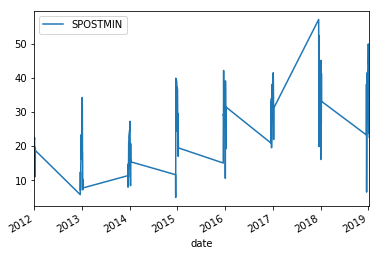

In [22]:
#Group by season
seasonal = meta_pirates1.groupby('SEASON')
christmas_pirates = seasonal.get_group('CHRISTMAS')
christmas_pirates.head()
#Plot times
christmas_pirates.plot(x="date", y = "SPOSTMIN")



In [13]:
####dont need

#sum all posted wait times by day
sum_by_day = meta_pirates.groupby('date')['SPOSTMIN'].sum()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])
sum_by_day.head()

date
2012-01-01      50.0
2012-01-02     285.0
2012-01-03     225.0
2012-01-04     230.0
2012-01-05     355.0
2012-01-06     325.0
2012-01-07     205.0
2012-01-08     420.0
2012-01-09     150.0
2012-01-10      80.0
2012-01-11      30.0
2012-01-12     280.0
2012-01-13     155.0
2012-01-14     235.0
2012-01-15     145.0
2012-01-16      40.0
2012-01-17      55.0
2012-01-18      35.0
2012-01-19      10.0
2012-01-20     175.0
2012-01-21     335.0
2012-01-22      75.0
2012-01-23      45.0
2012-01-24     145.0
2012-01-25      35.0
2012-01-27      55.0
2012-01-28     235.0
2012-01-29     240.0
2012-01-30      45.0
2012-01-31      80.0
               ...  
2019-04-01    4560.0
2019-04-02    4075.0
2019-04-03    4090.0
2019-04-04    4220.0
2019-04-05    3525.0
2019-04-06    3990.0
2019-04-07    2450.0
2019-04-08    2705.0
2019-04-09    2070.0
2019-04-10    3105.0
2019-04-11    2980.0
2019-04-12    3605.0
2019-04-13    2245.0
2019-04-14    2750.0
2019-04-15    5345.0
2019-04-16    5025.0
2019-04-

,date,SPOSTMIN
0,2012-01-01,50.0
1,2012-01-02,285.0
2,2012-01-03,225.0
3,2012-01-04,230.0
4,2012-01-05,355.0
